In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1. Read CSVs (adjust paths if needed)
biodiv_df = pd.read_csv('biodiversiteit_data.csv')

# 2. Quick Inspection
print("Biodiversity DataFrame Head:")
print(biodiv_df.head(), "\n")

print("Biodiversity DataFrame Info:")
print(biodiv_df.info(), "\n")



Biodiversity DataFrame Head:
                                               titel grondsoort  \
0  Opgave: 04-dec-2020 – Kers zuid bij: De Groene...  Kleigrond   
1  Opgave: 21-dec-2020 – Noord de grote perenboom...  Zandgrond   
2          Opgave: 29-nov-2020 – Stoev bij: De Stoev  Zandgrond   
3     Opgave: 13-nov-2020 – Peer bij: De Groene Oase  Kleigrond   
4      Opgave: 03-nov-2020 – het begin bij: Ellerhei  Zandgrond   

                        grondwaterstand  Biodiversiteitsindex  startjaar  \
0      15 centimeter onder het maaiveld                  0.73     2020.0   
1  60-120 centimeter onder het maaiveld                  0.00     2020.0   
2  60-120 centimeter onder het maaiveld                  0.58     2020.0   
3      15 centimeter onder het maaiveld                  0.76     2020.0   
4  60-120 centimeter onder het maaiveld                  0.41     2020.0   

   leeftijd plot  oppervlak     Datum  Cydonia oblonga Vranja  \
0            4.0    25000.0  20201204         

In [ ]:
# Extract the new columns
extracted = biodiv_df['titel'].str.extract(r'Opgave:\s*(\d{2}-\w{3}-\d{4})\s+–\s+(.*)')
extracted.columns = ['datum', 'beschrijving']

# Find the index of the 'titel' column
titel_index = biodiv_df.columns.get_loc('titel')

# Insert the new columns right after 'titel'
for i, col in enumerate(extracted.columns):
    biodiv_df.insert(titel_index + 1 + i, col, extracted[col])

# Create a new column 'jaar' by extracting the last 4 characters from 'datum'
biodiv_df.insert(biodiv_df.columns.get_loc('datum') + 1, 'jaar', biodiv_df['datum'].str[-4:].astype(int))


biodiv_df.head()


,titel,datum,jaar,beschrijving,grondsoort,grondwaterstand,Biodiversiteitsindex,startjaar,leeftijd plot,oppervlak,...,veronica,verschilillende gras soorten (plantnet pakt ze niet!),viburnum setigerum,viola tricolore,vogelwikke,vulgaris purpurea,wit walstro,witte honingklaver,zachte ooievaarsbek,zwarte mosterd
0,Opgave: 04-dec-2020 – Kers zuid bij: De Groene...,04-dec-2020,2020,Kers zuid bij: De Groene Oase,Kleigrond,15 centimeter onder het maaiveld,0.73,2020.0,4.0,25000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Opgave: 21-dec-2020 – Noord de grote perenboom...,21-dec-2020,2020,Noord de grote perenboom bij: Tante plukkie,Zandgrond,60-120 centimeter onder het maaiveld,0.00,2020.0,3.0,5000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Opgave: 29-nov-2020 – Stoev bij: De Stoev,29-nov-2020,2020,Stoev bij: De Stoev,Zandgrond,60-120 centimeter onder het maaiveld,0.58,2020.0,0.0,8250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Opgave: 13-nov-2020 – Peer bij: De Groene Oase,13-nov-2020,2020,Peer bij: De Groene Oase,Kleigrond,15 centimeter onder het maaiveld,0.76,2020.0,1.0,25000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Opgave: 03-nov-2020 – het begin bij: Ellerhei,03-nov-2020,2020,het begin bij: Ellerhei,Zandgrond,60-120 centimeter onder het maaiveld,0.41,2020.0,1.0,5000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
biodiv_df.to_csv('biodiv_with_date.csv', index=False)

In [ ]:
# Remove duplicates that are the same across all columns
df_no_full_duplicates = biodiv_df.drop_duplicates()

# Optionally: Save the cleaned data
df_no_full_duplicates.to_csv("cleaned_data.csv", index=False)

                                                 titel  \
52   Opgave: 30-sep-2021 – Oude Eik bij: Klein Stettyn   
74   Opgave: 02-jul-2021 – Duitse Kwets 2e rij bij:...   
114  Opgave: 07-jul-2022 – Testplot bij: Schellinkwoud   
124     Opgave: 26-Jun-2022 – Treurwilg bij: Greenlife   

                    grondsoort                      grondwaterstand  \
52                   Zandgrond     15 centimeter onder het maaiveld   
74                   Kleigrond  15-60 centimeter onder het maaiveld   
114  lemig zand en rulle klei   15-60 centimeter onder het maaiveld   
124                  Zandgrond                               dieper   

     Biodiversiteitsindex  startjaar  leeftijd plot  oppervlak     Datum  \
52                   0.50     2021.0            5.0     6000.0  20210930   
74                   0.73     2021.0            0.5     5000.0  20210702   
114                  0.83     2018.0           10.0       10.2  20220707   
124                  0.90     2020.0           10

### Summary

In [23]:
# Summary statistics for numerical columns
print("Biodiversity Summary:")
print(biodiv_df.describe())


Biodiversity Summary:
       Biodiversiteitsindex     startjaar  leeftijd plot      oppervlak  \
count            257.000000  2.580000e+02     261.000000     258.000000   
mean               0.783580  3.936526e+05       9.136015   14027.074031   
std                0.200323  2.791247e+06      25.271653   20870.900753   
min                0.000000  2.011000e+03      -2.000000      -4.000000   
25%                0.750000  2.018000e+03       1.000000    2000.000000   
50%                0.850000  2.020000e+03       2.000000    6100.000000   
75%                0.900000  2.021000e+03       6.000000   22000.000000   
max                0.980000  2.021110e+07     250.000000  140000.000000   

              Datum  
count  2.610000e+02  
mean   2.022099e+07  
std    1.367396e+04  
min    2.020053e+07  
25%    2.021062e+07  
50%    2.022061e+07  
75%    2.023071e+07  
max    2.024112e+07  


### Unique values

In [24]:
# Check unique soil types, years, or categories
if 'grondsoort' in biodiv_df.columns:
    print("\nUnique soil types in Biodiv data:", biodiv_df['grondsoort'].unique())


# Quick value counts for a relevant categorical column
if 'bestemming' in biodiv_df.columns:
    print("\nCount of different bestemmingen in Biodiv data:")
    print(biodiv_df['bestemming'].value_counts())



Unique soil types in Biodiv data: ['Kleigrond' 'Zandgrond' 'Los, silt of lemig zand' nan
 'zavel, rivierklei met rivierzand' 'lemig zand en rulle klei '
 'Bovenste 50 cm zavel daaronder rivierklei' 'zwaklemig fijn zand'
 'Combinatie zand, klei en veen' 'zand gemengd met keileemlagen' 'mix'
 'Löss, silt of lemig zand'
 'Veen/klei grond met daarboven een laag organisch materiaal.'
 'zanddek op veen ' 'Sandy soil' 'Clay soil' 'zand en veen' 'leem'
 'Veldpodzol' 'Potzol' 'zand met dun laagje vruchtbare aarde' 'Veen'
 '70 cm klei op veen']

Count of different bestemmingen in Biodiv data:
bestemming
['Agrarisch']                                                                      69
['Agrarisch', '(Archeologische of landschappelijke) waarde']                       43
['Natuur']                                                                         20
['Bos']                                                                            14
['Natuur', '(Archeologische of landschappelijke) waard

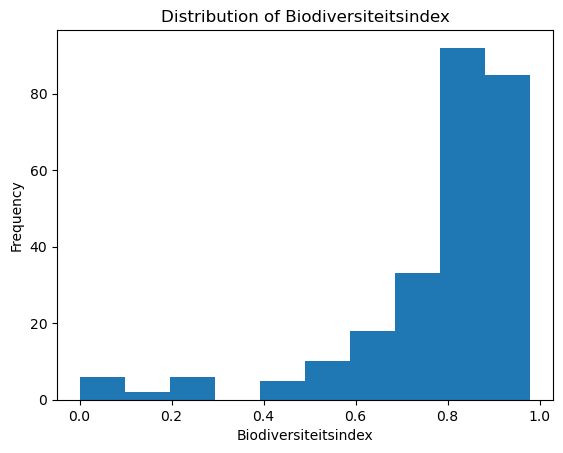

In [25]:
# Check if 'Biodiversiteitsindex' exists in columns
if 'Biodiversiteitsindex' in biodiv_df.columns:
    plt.figure()
    plt.hist(biodiv_df['Biodiversiteitsindex'].dropna())
    plt.title("Distribution of Biodiversiteitsindex")
    plt.xlabel("Biodiversiteitsindex")
    plt.ylabel("Frequency")
    plt.show()


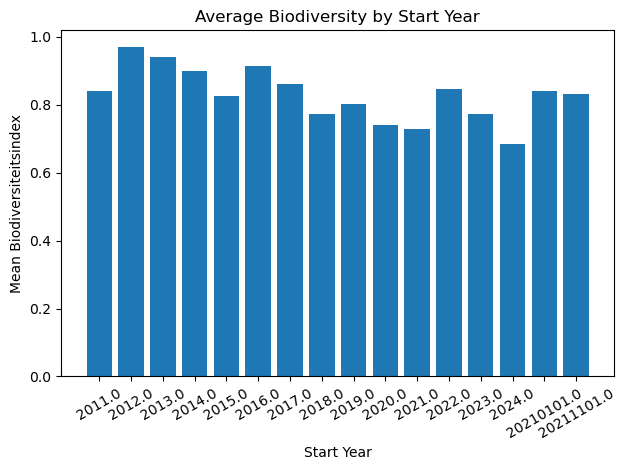

In [26]:
if 'Biodiversiteitsindex' in biodiv_df.columns and 'startjaar' in biodiv_df.columns:
    # Group by year, compute mean index
    avg_biodiv_by_year = biodiv_df.groupby('startjaar')['Biodiversiteitsindex'].mean().reset_index()

    plt.figure()
    plt.bar(avg_biodiv_by_year['startjaar'].astype(str),
            avg_biodiv_by_year['Biodiversiteitsindex'])
    plt.title("Average Biodiversity by Start Year")
    plt.xlabel("Start Year")
    plt.ylabel("Mean Biodiversiteitsindex")

       # Rotate x-axis labels if many soil types
    plt.xticks(rotation=30)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    plt.show()


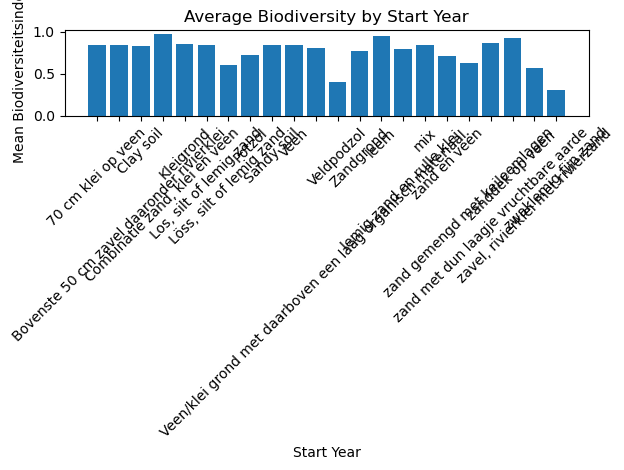

In [35]:
if 'Biodiversiteitsindex' in biodiv_df.columns and 'grondsoort' in biodiv_df.columns:
    # Group by year, compute mean index
    avg_biodiv_by_year = biodiv_df.groupby('grondsoort')['Biodiversiteitsindex'].mean().reset_index()

    plt.figure()
    plt.bar(avg_biodiv_by_year['grondsoort'].astype(str),
            avg_biodiv_by_year['Biodiversiteitsindex'])
    plt.title("Average Biodiversity by Start Year")
    plt.xlabel("Start Year")
    plt.ylabel("Mean Biodiversiteitsindex")

       # Rotate x-axis labels if many soil types
    plt.xticks(rotation=45)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    plt.show()

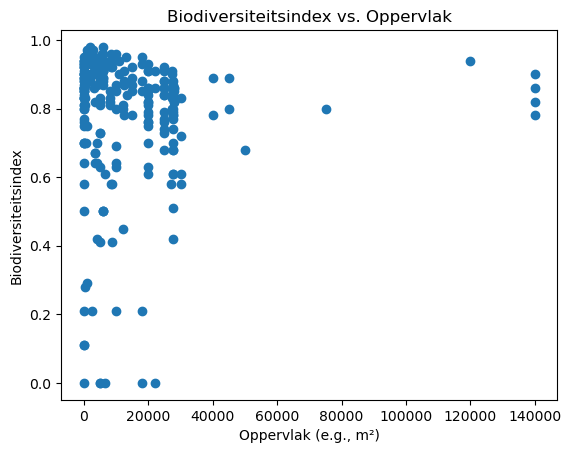

In [28]:
if 'Biodiversiteitsindex' in biodiv_df.columns and 'oppervlak' in biodiv_df.columns:
    # Drop rows missing either value
    temp_df = biodiv_df[['oppervlak','Biodiversiteitsindex']].dropna()

    plt.figure()
    plt.scatter(temp_df['oppervlak'], temp_df['Biodiversiteitsindex'])
    plt.title("Biodiversiteitsindex vs. Oppervlak")
    plt.xlabel("Oppervlak (e.g., m²)")
    plt.ylabel("Biodiversiteitsindex")
    plt.show()
